In [1]:
# Ian McLean
# PHYS 434  1877711
# 11/16/2022

__LHC Data:__

__1.)__ Make two plots of Mass and d2 each with Signal and Background distributions. Describe the shape of the two distribution, commenting on the discrimination power of signal and background. Also make a 2D scatter plot between Mass and d2 for both signal and background.

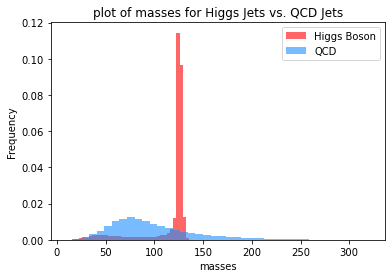

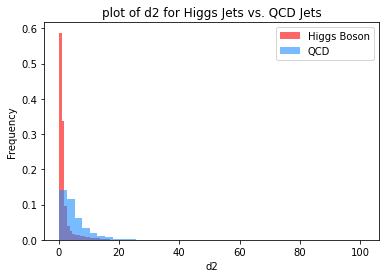

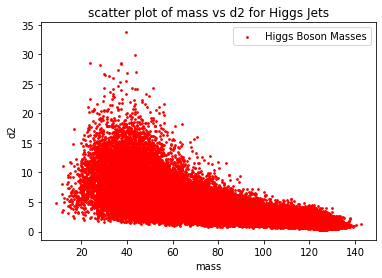

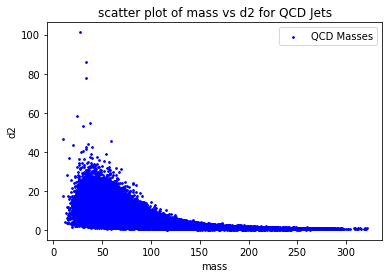

In [2]:
# imports
import pickle
import matplotlib.pyplot as plt
import numpy as np
# open the higgs file of interest, and use pickle loading
infile = open ("higgs_100000_pt_250_500.pkl",'rb')
new_dict_higgs = pickle.load(infile)
# open the qfc file of interest, and use pickle loading
infile = open ("qcd_100000_pt_250_500.pkl",'rb')
new_dict_qcd = pickle.load(infile)
# plotting histograms for higgs and background jets masses
plt.hist(new_dict_higgs['mass'], density = True, color = 'red', alpha = .6, bins = 40)
plt.hist(new_dict_qcd['mass'], density = True, color = 'dodgerblue', alpha = .6, bins = 40)
# adding all necessary labels
plt.ylabel('Frequency')
# specific key as label
plt.xlabel('masses')
# adding title
plt.title("plot of masses for Higgs Jets vs. QCD Jets")
plt.legend(['Higgs Boson', 'QCD'])
plt.show()
# plotting histograms for higgs and background jets d2
plt.hist(new_dict_higgs['d2'], density = True, color = 'red',alpha = .6, bins = 40)
plt.hist(new_dict_qcd['d2'], density = True, color = 'dodgerblue', alpha = .6, bins = 40)
# adding all necessary labels
plt.ylabel('Frequency')
# specific key as label
plt.xlabel('d2')
# adding title
plt.title("plot of d2 for Higgs Jets vs. QCD Jets")
plt.legend(['Higgs Boson', 'QCD'])
plt.show()
# making the requested scatter plots
# scatter plot for mass vs d2 of Higgs Boson
plt.scatter(new_dict_higgs['mass'],new_dict_higgs['d2'],color = 'red',s=3)
# adding all necessary labels
plt.ylabel('d2')
# specific key as label
plt.xlabel('mass')
# adding title
plt.title("scatter plot of mass vs d2 for Higgs Jets")
plt.legend(['Higgs Boson Masses'])
plt.show()
# scatter plot for mass vs d2 of QCD
plt.scatter(new_dict_qcd['mass'],new_dict_qcd['d2'],color = 'blue',s=3)
# adding all necessary labels
plt.ylabel('d2')
# specific key as label
plt.xlabel('mass')
# adding title
plt.title("scatter plot of mass vs d2 for QCD Jets")
plt.legend(['QCD Masses'])
plt.show()

The first plots are the masses of the Higgs Boson jets overlaid with the QCD jet masses which are plotted as mass vs frequency. When looking at the shape of the two plots, we can see that the two shapes are distincty different. For the Higgs Boson masses, the shape is sharply exponential around 100 and then drops around 135 (with a frequency of .11). Thus, the masses of higgs boson jets very likely fall in a very small range of values. As for the QCD masses, they are much more spread out over a larger range of around [20,250]. The mean is less than the Higgs Boson jets, at around 75 with a frequency of less than .02. There is very clear discrimination power between the two due to the great difference in distribution of masses and likelyhood for a random gien mass being in one distribution over the other. As for the d2 plots, they have a similar downward trend and mean, however the frequency of the the higgs boson d2 is much higher at around .6 for the mean, and for the QCD that frequency of the mean is only about .14. It is still very easy to distinguish the two plots vidually, and any occurance around the mean of the Higgs Boson d2 is very likley from the Higgs Boson jet.

As for the scatter plots of mass vs d2, they are plotted as such, wehere we can see that the Higgs Boson masses have a higher frequency of distribution over a smaller range of d2, which checks out with what we see in the plots above, with the sharpness of the Higgs Boson jet plots above. Clearly, for a higher observed mass, it will very likely correspond to a very low d2, whereas a smaller mass could yield a higher d2 potentially. This trend is constant across both QCD and Higgs Boson jets.

__2.)__ Now assume a signal yield of 100 and a background yield of 20,000, re-weight the signal and background distribution such that they satisfy this yield. Then draw two histograms with the signal stacked on the background. Describe the visibility of observing the signal over the background.

Text(0, 0.5, 'Counts')

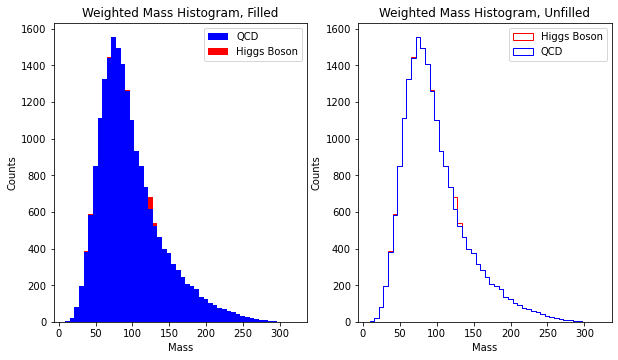

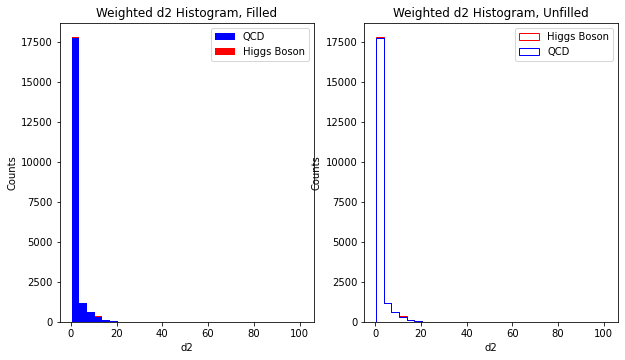

In [3]:
# defining histogram plots to for the weighted mass and weighted d2
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5.5))
# passing in mass values as a list of lists
mass_list = [new_dict_qcd['mass'],new_dict_higgs['mass']]
# defining the weights to pass into command and weight the plots
custom_weight1 = 100/len(new_dict_higgs['mass'])
custom_weight2 = 20000/len(new_dict_qcd['mass'])
# defining plotting colors in a list
colors = ['blue','red']
# weighting and plotting the histogram plot for mass as a filled plot
weighted_values_inbin, weighted_bins, _ = ax0.hist(mass_list, histtype='bar',
                                                   weights= [(custom_weight2 * np.ones(len(new_dict_higgs['mass']))),
                                                             (custom_weight1 * np.ones(len(new_dict_higgs['mass'])))],
                                                   stacked=True,label=['QCD','Higgs Boson'], bins = 50, color = colors)
# adding necessary title and labels in legend
ax0.set_title('Weighted Mass Histogram, Filled')
ax0.legend();
ax0.set_xlabel('Mass')
ax0.set_ylabel('Counts')
# weighting and plotting the histogram plot for mass but unfilled
weighted_values_inbin, weighted_bins, _ = ax1.hist(mass_list, weights= [(custom_weight2 * np.ones(len(new_dict_higgs['mass']))),
                                                             (custom_weight1 * np.ones(len(new_dict_higgs['mass'])))],
                                                   stacked=True,label=['QCD','Higgs Boson'], bins = 50, color = colors, 
                                                   fill = False,histtype='step')
# adding necessary title and labels in legend
ax1.set_title('Weighted Mass Histogram, Unfilled')
ax1.legend();
ax1.set_ylabel('Counts')
ax1.set_xlabel('Mass')
# defining histogram plots to for the weighted mass and weighted d2
fig, (ax2, ax3) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5.5))
# passing in d2 values as a list of lists
d2_list = [new_dict_higgs['d2'],new_dict_qcd['d2']]
# weighting and plotting the histogram plot for d2 as filled
weighted_values_inbin, weighted_bins, _ = ax2.hist(d2_list, histtype='bar',
                                                   weights= [(custom_weight2 * np.ones(len(new_dict_higgs['mass']))),
                                                             (custom_weight1 * np.ones(len(new_dict_higgs['mass'])))],
                                                   stacked=True,label=['QCD','Higgs Boson'], bins = 30, color = colors)
# adding necessary title and labels in legend
ax2.set_title('Weighted d2 Histogram, Filled')
ax2.legend();
ax2.set_xlabel('d2')
ax2.set_ylabel('Counts')
# weighting and plotting the histogram plot for d2 but unfilled
weighted_values_inbin, weighted_bins, _ = ax3.hist(d2_list, weights= [(custom_weight2 * np.ones(len(new_dict_higgs['mass']))),
                                                             (custom_weight1 * np.ones(len(new_dict_higgs['mass'])))],
                                                   stacked=True,label=['QCD','Higgs Boson'], bins = 30, color = colors,
                                                   fill = False,histtype='step')
# adding necessary title and labels in legend
ax3.set_title('Weighted d2 Histogram, Unfilled')
ax3.legend();
ax3.set_xlabel('d2')
ax3.set_ylabel('Counts')

Above are the plots for the reweighted histograms of the mass and d2 for both the QCD and the Higgs Boson jets. In terms of observing the signal from the Higgs Boson, it is now much clearer that the signal values are stacked above the QCD in whichever bin they are present in. Thus, their visibility is increased as they are stacked above the QCD rather than with it. It is clear that the weighted Higgs Boson mass and d2 values are generally only slightly higher than the QCD for each respective bin that both are in, however, it is visibly clear which bins this happens in. Two histograms are made, filled and unfilled, to help visualize the stacking and reweighting better.

__3.)__ Using the weighted samples from Q2 apply a Mass cut of [120, 130] GeV. Now again make the two histograms as above. Does the Mass distribution look as you expect it? how does the d2 plot compare to the one in Q2?

Text(0, 0.5, 'Counts')

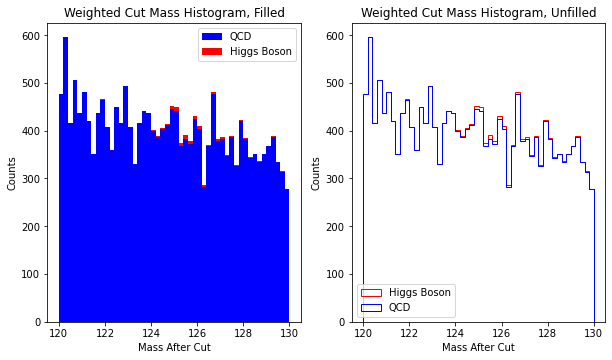

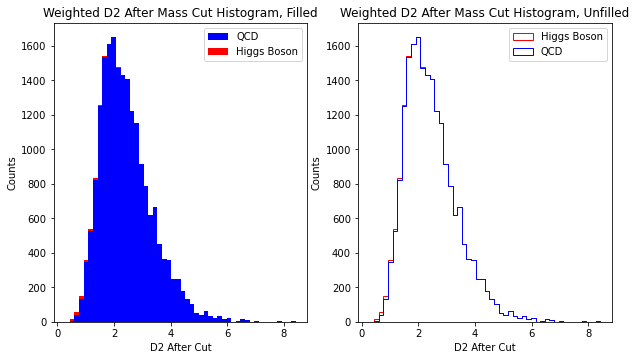

In [5]:
# mass arrays to use
higgs = new_dict_higgs['mass']
qcd = new_dict_qcd['mass']
#masking higgs masses
cut_higgs_mass = higgs[(120 < higgs) & (higgs < 130)]
#masking QCD mass
cut_qcd_mass = qcd[(120 < qcd) & (qcd < 130)]
# defining weights where first one corresponds to Higgs boson, and second is QCD 
custom_weight1 = 100/len(cut_higgs_mass)
custom_weight2 = 20000/len(cut_qcd_mass)
# making necessary lists to pass into hist function to plot
colors = ['blue','red']
# difining histogram plots to for the weighted cut mass
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5.5))
# passing in mass values as a list of lists
mass_list = [cut_qcd_mass,cut_higgs_mass]
# defining the weights to pass into command and weight the plots
# weighting and plotting the histogram plot for cut mass, as a filled histogram
weighted_values_inbin, weighted_bins, _ = ax0.hist(mass_list, histtype='bar',
                                                   weights= [(custom_weight2 * np.ones(len(cut_qcd_mass))),
                                                             (custom_weight1 * np.ones(len(cut_higgs_mass)))],
                                                   stacked=True,label=['QCD','Higgs Boson'], bins = 50, color = colors)
# adding necessary title and labels in legend
ax0.set_title('Weighted Cut Mass Histogram, Filled')
ax0.legend();
ax0.set_xlabel('Mass After Cut')
ax0.set_ylabel('Counts')
# weighting and plotting the histogram plot for cut mass, as an unfilled histogram
weighted_values_inbin, weighted_bins, _ = ax1.hist(mass_list, weights= [(custom_weight2 * np.ones(len(cut_qcd_mass))),
                                                             (custom_weight1 * np.ones(len(cut_higgs_mass)))],
                                                   stacked =True,label=['QCD','Higgs Boson'], bins = 50, color = colors,
                                                   fill = False,histtype='step')
# adding necessary title and labels in legend
ax1.set_title('Weighted Cut Mass Histogram, Unfilled')
ax1.legend();
ax1.set_xlabel('Mass After Cut')
ax1.set_ylabel('Counts')
# d2
# want d2 correspond to accepted higgs and qcd mass vals
d2_cut_indices_higgs = cut_higgs_mass.index
d2_cut_indices_qcd = cut_qcd_mass.index
# empty list to hold the values of d2 corresponding to accepted mass indices
d2_cut_higgs = []
d2_cut_qcd = []
# looping through accepted indices for masses of Higgs and Qcd and getting corresponding d2 vals
for i  in d2_cut_indices_higgs:
    d2_cut_higgs.append(new_dict_higgs['d2'][i])
    d2_cut_indices2 = cut_qcd_mass.index
for i  in d2_cut_indices2:
    d2_cut_qcd.append(new_dict_qcd['d2'][i])
# arrays are d2_cut_higgs and d2_cut_qcd to plot 
# defining histogram plots to for the weighted cut d2
fig, (ax2, ax3) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5.5))
# passing in d2 values as a list of lists
d2_list = [d2_cut_qcd, d2_cut_higgs]
# weighting and plotting the histogram plot for d2 as filled
weighted_values_inbin, weighted_bins, _ = ax2.hist(d2_list, histtype='bar',
                                                   weights= [(custom_weight2 * np.ones(len(d2_cut_qcd))),
                                                             (custom_weight1 * np.ones(len(d2_cut_higgs)))],
                                                   stacked=True,label=['QCD','Higgs Boson'], bins = 50, color = colors)
# adding necessary title and labels in legend
ax2.set_title('Weighted D2 After Mass Cut Histogram, Filled')
ax2.legend();
ax2.set_xlabel('D2 After Cut')
ax2.set_ylabel('Counts')
# weighting and plotting the histogram plot for d2 as unfilled
weighted_values_inbin, weighted_bins, _ = ax3.hist(d2_list, weights= [(custom_weight2 * np.ones(len(d2_cut_qcd))),
                                                             (custom_weight1 * np.ones(len(d2_cut_higgs)))],
                                                   stacked=True,label=['QCD','Higgs Boson'], bins = 50, color = colors,
                                                   fill = False,histtype='step')
# adding necessary title and labels in legend
ax3.set_title('Weighted D2 After Mass Cut Histogram, Unfilled')
ax3.legend();
ax3.set_xlabel('D2 After Cut')
ax3.set_ylabel('Counts')

The mass plot seems as we would expect it to be. It appears to be closer to a uniform distribution than before, where there are counts of Higgs Boson jet mass in a large fraction of the bins compared to before. This means we did a good job eliminating counts of just pure background in several bins. As for the D2, it is also more widly distributed and the plots appear to be closer to a bell curve than before. There are several more bins for D less than 4 that have counts of Higgs jet D2 than before.

__4.)__ Now we want to scan over d2 to find a good cut on d2 to increase our significance. The siginificance formula is given below(it's a good exercise to think about the derivation of the formula), and it is in the unit of 
σ
:

$$significance=\frac{Nsignal}{\sqrt{N_{bkg}}}$$

1). Inspect the d2 distribution after you apply the mass cut, how does it change compared to that without any mass cut?

In [6]:
print("The length of the d2 distribution for the Higgs jets before the mass cut is: " + str(len(new_dict_higgs['d2'])))
print("The length of the d2 distribution for the Higgs jets after the mass cut is: " + str(len(d2_cut_higgs)))

The length of the d2 distribution for the Higgs jets before the mass cut is: 100000
The length of the d2 distribution for the Higgs jets after the mass cut is: 75847


Aside from the lower amount of counts in the histogram as we rejected some, we can clearly see that the values are more distrivuted over the bins than before. They all seem to be below 4 and are in almost each of these bins leading up to a bit below 4. There no longer seems to be counts between 2 and 20.

2). Let's say you choose a d2 cut value of 4, do you want to keep the histogram below 4 of above 4? Which makes signal more siginificant?

With d2 cut value of 4 and keeping the histogram below 4, there are: 75837 Higgs entries
With d2 cut value of 4 and keeping the histogram above 4, there are: 10 Higgs entries
With d2 cut value of 4 and keeping the histogram above 4, there are: 313 QCD entries
With d2 cut value of 4 and keeping the histogram below 4, there are: 4588 QCD entries
The significance with keeping the histogram above 4 is: 0.5652334189442215
The significance with keeping the histogram below 4 is: 1119.6168864031542
Thus, the signal is more significant with histogram below cut 4, so we should keep it below 4.


Text(0, 0.5, 'Counts')

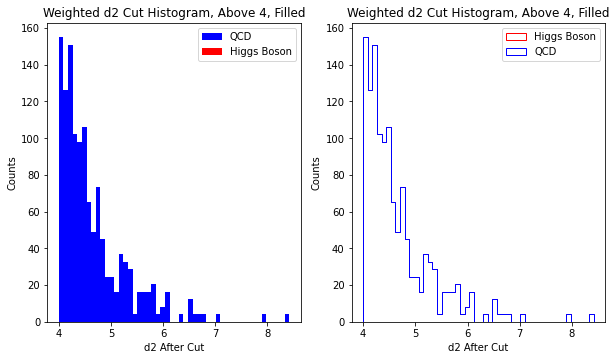

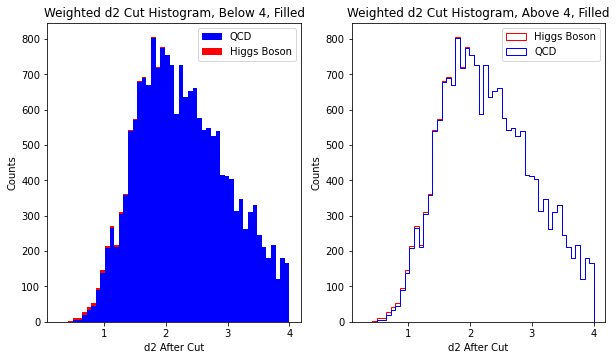

In [8]:
# converting list to array to mask
d2_cut_higgs = np.array(d2_cut_higgs)
# testing the cut for d2 of Higgs both above and below the specified value of 4
cut_higgs_d2_trial1 = d2_cut_higgs[(d2_cut_higgs < 4)]
cut_higgs_d2_trial2 = d2_cut_higgs[(4 < d2_cut_higgs)]
print("With d2 cut value of 4 and keeping the histogram below 4, there are: " + str(len(cut_higgs_d2_trial1)) + " Higgs entries") 
print("With d2 cut value of 4 and keeping the histogram above 4, there are: " + str(len(cut_higgs_d2_trial2)) + " Higgs entries") 
# converting list to array to mask
d2_cut_qcd = np.array(d2_cut_qcd)
# testing the cut for d2 of qcd both above and below the specified value of 4
cut_qcd_d2_trial1 = d2_cut_qcd[d2_cut_qcd > 4]
cut_qcd_d2_trial2 = d2_cut_qcd[d2_cut_qcd < 4]
print("With d2 cut value of 4 and keeping the histogram above 4, there are: " + str(len(cut_qcd_d2_trial1)) + " QCD entries") 
print("With d2 cut value of 4 and keeping the histogram below 4, there are: " + str(len(cut_qcd_d2_trial2)) + " QCD entries") 
# calculating the specific significances for each scenario
Sig_above_4 = len(cut_higgs_d2_trial2)/np.sqrt(len(cut_qcd_d2_trial1))
Sig_below_4 = len(cut_higgs_d2_trial1)/np.sqrt(len(cut_qcd_d2_trial2))
print("The significance with keeping the histogram above 4 is: " + str(Sig_above_4))
print("The significance with keeping the histogram below 4 is: " + str(Sig_below_4))
print("Thus, the signal is more significant with histogram below cut 4, so we should keep it below 4.")
# difining histogram plots to for the weighted cut mass
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5.5))
# passing in mass values as a list of lists
d2_test_above = [cut_qcd_d2_trial1,cut_higgs_d2_trial2]
# defining the weights to pass into command and weight the plots
# weighting and plotting the histogram plot for cut mass, as a filled histogram
weighted_values_inbin, weighted_bins, _ = ax0.hist(d2_test_above, histtype='bar',
                                                   weights= [(custom_weight2 * np.ones(len(cut_qcd_d2_trial1))),
                                                             (custom_weight1 * np.ones(len(cut_higgs_d2_trial2)))],
                                                   stacked=True,label=['QCD','Higgs Boson'], bins = 50, color = colors)
# adding necessary title and labels in legend
ax0.set_title('Weighted d2 Cut Histogram, Above 4, Filled')
ax0.legend();
ax0.set_xlabel('d2 After Cut')
ax0.set_ylabel('Counts')
# weighting and plotting the histogram plot for cut mass, as a filled histogram
weighted_values_inbin, weighted_bins, _ = ax1.hist(d2_test_above, histtype='step',
                                                   weights= [(custom_weight2 * np.ones(len(cut_qcd_d2_trial1))),
                                                             (custom_weight1 * np.ones(len(cut_higgs_d2_trial2)))],
                                                   stacked=True,label=['QCD','Higgs Boson'], bins = 50, color = colors)
# adding necessary title and labels in legend
ax1.set_title('Weighted d2 Cut Histogram, Above 4, Filled')
ax1.legend();
ax1.set_xlabel('d2 After Cut')
ax1.set_ylabel('Counts')
#TESTING 2
# difining histogram plots to for the weighted cut mass
fig, (ax2, ax3) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5.5))
# passing in mass values as a list of lists
d2_test_below = [cut_qcd_d2_trial2,cut_higgs_d2_trial1]
# defining the weights to pass into command and weight the plots
# weighting and plotting the histogram plot for cut mass, as a filled histogram
weighted_values_inbin, weighted_bins, _ = ax2.hist(d2_test_below, histtype='bar',
                                                   weights= [(custom_weight2 * np.ones(len(cut_qcd_d2_trial2))),
                                                             (custom_weight1 * np.ones(len(cut_higgs_d2_trial1)))],
                                                   stacked=True,label=['QCD','Higgs Boson'], bins = 50, color = colors)
# adding necessary title and labels in legend
ax2.set_title('Weighted d2 Cut Histogram, Below 4, Filled')
ax2.legend();
ax2.set_xlabel('d2 After Cut')
ax2.set_ylabel('Counts')
# weighting and plotting the histogram plot for cut mass, as a filled histogram
weighted_values_inbin, weighted_bins, _ = ax3.hist(d2_test_below, histtype='step',
                                                   weights= [(custom_weight2 * np.ones(len(cut_qcd_d2_trial2))),
                                                             (custom_weight1 * np.ones(len(cut_higgs_d2_trial1)))],
                                                   stacked=True,label=['QCD','Higgs Boson'], bins = 50, color = colors)
# adding necessary title and labels in legend
ax3.set_title('Weighted d2 Cut Histogram, Above 4, Filled')
ax3.legend();
ax3.set_xlabel('d2 After Cut')
ax3.set_ylabel('Counts')

It is clear after calculation, that the cut is best kept below 4 as that leads to a much larger significance than that of the histogram for a d2 cut above 4. In order to calculate this, we check the length of the arrays for D2 of Higgs and QCD jets for values above and then below 4. Then, these lengths are put into the equation for significance listed above. This yields a sigificance of 1119.62 for keeping the histogram below 4 while only a significance of .565 for histogram above 4. This can be attributed to the fact that there are only 10 Higgs d2 entried for values above 4. The plots above also demonstrate why we would want to cut and keep the values below 4, as that shows signal, whereas the cut above 4 doesn't have nearly as much signal. In fact, it isn't even visible in the plots.

3). What range can be chosen to scan the d2 cut?

[1.00000000e-03 8.44833333e-02 1.67966667e-01 2.51450000e-01
 3.34933333e-01 4.18416667e-01 5.01900000e-01 5.85383333e-01
 6.68866667e-01 7.52350000e-01 8.35833333e-01 9.19316667e-01
 1.00280000e+00 1.08628333e+00 1.16976667e+00 1.25325000e+00
 1.33673333e+00 1.42021667e+00 1.50370000e+00 1.58718333e+00
 1.67066667e+00 1.75415000e+00 1.83763333e+00 1.92111667e+00
 2.00460000e+00 2.08808333e+00 2.17156667e+00 2.25505000e+00
 2.33853333e+00 2.42201667e+00 2.50550000e+00 2.58898333e+00
 2.67246667e+00 2.75595000e+00 2.83943333e+00 2.92291667e+00
 3.00640000e+00 3.08988333e+00 3.17336667e+00 3.25685000e+00
 3.34033333e+00 3.42381667e+00 3.50730000e+00 3.59078333e+00
 3.67426667e+00 3.75775000e+00 3.84123333e+00 3.92471667e+00
 4.00820000e+00 4.09168333e+00 4.17516667e+00 4.25865000e+00
 4.34213333e+00 4.42561667e+00 4.50910000e+00 4.59258333e+00
 4.67606667e+00 4.75955000e+00 4.84303333e+00 4.92651667e+00
 5.01000000e+00]


/tmp/ipykernel_56/277949292.py:14: RuntimeWarning: invalid value encountered in double_scalars
  Sig_below_cut = len(cut_higgs_d2_trial1)/np.sqrt(len(cut_qcd_d2_trial2))
/tmp/ipykernel_56/277949292.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  Sig_below_cut = len(cut_higgs_d2_trial1)/np.sqrt(len(cut_qcd_d2_trial2))


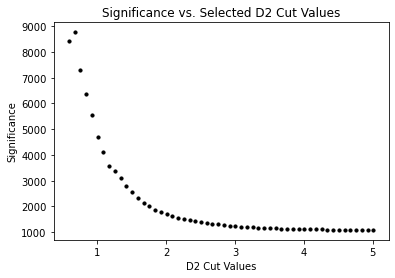

75847
4835
[nan, nan, nan, nan, inf, inf, inf, 8441.0, 8765.909137106088, 7306.0, 6383.750468964149, 5561.250781650676, 4695.009633585373, 4131.0555561740775, 3566.2395661559362, 3383.4341734695463, 3109.370837146729, 2815.0232406666846, 2544.6985221989826, 2327.890487779966, 2153.3594841645086, 2012.419832325205, 1880.1811868422649, 1784.0716411192625, 1695.5240152165768, 1624.6713945319266, 1564.6892122385823, 1518.8066272388053, 1474.0917854861818, 1431.3570400446413, 1390.782211582817, 1357.3519521094834, 1328.0474329300703, 1302.109212742222, 1275.6401295080896, 1252.8984148894222, 1236.6791556608225, 1217.5048268334087, 1205.2721445808547, 1191.3206231537063, 1180.8486474434453, 1169.2021713610818, 1157.6012988176255, 1149.4130917134619, 1142.4500275264104, 1135.5021351371818, 1130.5325199292015, 1124.6088248884294, 1119.1438991806062, 1115.0529990370317, 1111.4841943370893, 1107.4626340999073, 1104.0690633811844, 1101.7513753372887, 1099.1164609585762, 1096.930307236188, 1095.32

In [12]:
# range needs below 4, so maybe [0,5]
# defining linspace to calculate significance at each cut
cuts = np.linspace(.001,5.01,61)
print(cuts)
# list to hold all calculated significances
sig_vals = []
# calculating significance for each value in the linspace determined as a cut value
for cut in cuts:
    # testing the cut for d2 of Higgs both above and below the specified value in cuts
    cut_higgs_d2_trial1 = d2_cut_higgs[(d2_cut_higgs < cut)]
    # testing the cut for d2 of qcd both above and below the specified value in cuts
    cut_qcd_d2_trial2 = d2_cut_qcd[d2_cut_qcd < cut]
    # calculating the specific significances for each scenario
    Sig_below_cut = len(cut_higgs_d2_trial1)/np.sqrt(len(cut_qcd_d2_trial2))
    sig_vals.append(Sig_below_cut)
# plotting the siginificance vs each cut value
plt.scatter(cuts, sig_vals,color = 'black',s=10)
# adding all necessary labels
plt.ylabel('Significance')
plt.xlabel('D2 Cut Values')
# adding title
plt.title("Significance vs. Selected D2 Cut Values")
plt.show()



print(len(cut_higgs_d2_trial1))
print(len(cut_qcd_d2_trial2))
print(sig_vals)

It is clear to see that a range that mainly consists of [0,4] is the most effective in this scenario. As for the plot above, for different d2 cut values in the defined linspace, the significance is calculated and appended to a list. Clearly, the significance decreases with increasing d2 cut values. We should note that the 3 Sigma value that we desire is corresponding to a significance of _____.

__HERA Data:__

1. For some baseline pair, compute the amplitude of the difference in visibility between each pair of adjacent time slices (there should be 19 such pairs, in total).

In [18]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'pyuvdata'